In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision


import numpy as np
import matplotlib.pyplot as plt

from data.EuroNotes import EuroNotes
from models.ResNet18 import pretrained_res18

In [2]:
# # # # # # # # # # # # # # # #
# Load Classifier Models
# # # # # # # # # # # # # # # #


print('Loading base classifier model and robust model')
model_base = pretrained_res18()
model_robust = pretrained_res18()
print('Loaded')

Loading base classifier model and robust model
Loaded


In [41]:
means = np.array([ 0.14588552,  0.26887908,  0.14538361])
stds = np.array([ 0.20122388,  0.2800698 ,  0.20029236])
transformations = transforms.Compose([transforms.ToTensor(), transforms.Normalize(means, stds)])

train_set = EuroNotes('../data-augmentation/banknotes_augmented/train', transform=transformations, resize=False)
val_set = EuroNotes('../data-augmentation/banknotes_augmented/val', transform=transformations, resize=False)

train_loader = DataLoader(train_set, batch_size=25, shuffle=True, num_workers=16)
val_loader = DataLoader(val_set, batch_size=25, shuffle=True, num_workers=16)

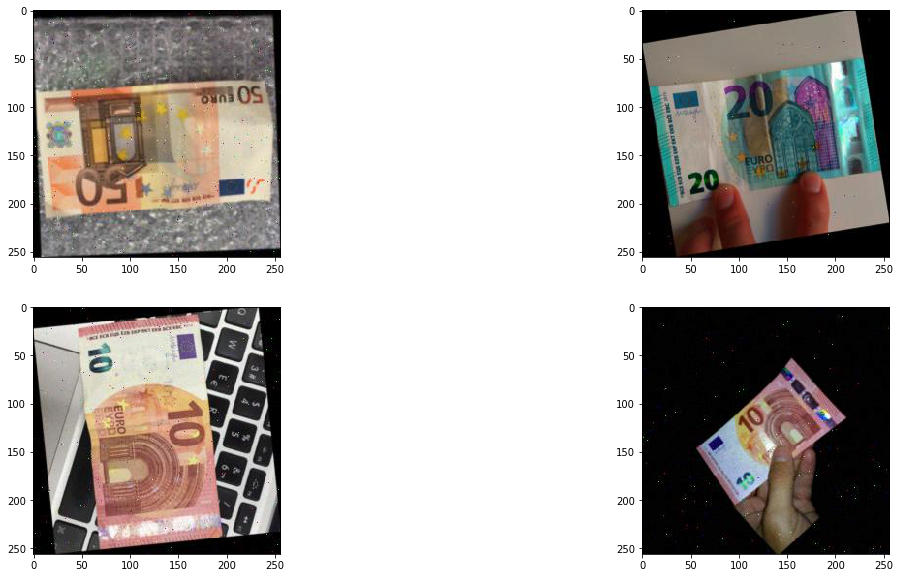

In [72]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(20,10))

for i_batch, data in enumerate(train_loader):
    if i_batch > 3:
        break
    images = Variable(data['image'])
    im = images[1, :, :, :].data.numpy() * stds.reshape((3, 1, 1))
    
    im = im + means.reshape((3, 1, 1))
    im = im.astype(float)
    im = im.astype(float)
    im -= np.min(im)
    im /= np.max(im)
    im = np.swapaxes(np.swapaxes(im, 0, 2).reshape((256, 256, 3)), 0, 1)
    ax = plt.subplot(gs[int(i_batch/2), i_batch % 2])
    plt.imshow(im)
plt.show()
    